## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [82]:
import pandas as pd
import seaborn as sns
import graphviz
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import tree

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split


from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()


X = pd.DataFrame(housing.data, columns = housing.feature_names)
y = pd.DataFrame(housing.target, columns = ['MEDV'])

In [83]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [84]:
y.head()

,MEDV
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Treinamento das arvores
arvore = DecisionTreeRegressor(max_depth = 8)
arvore.fit(X_train, y_train)

y_train_pred = arvore.predict(X_train)
y_test_pred = arvore.predict(X_test)

mse_train_arvore = mean_squared_error(y_train, y_train_pred)
mse_test_arvore = mean_squared_error(y_test, y_test_pred)
print("MSE de treinamento da árvore:", mse_train_arvore)
print("MSE de teste da árvore:", mse_test_arvore)

MSE de treinamento da árvore: 0.30141235500836305
MSE de teste da árvore: 0.40026295765843356


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [86]:
caminho = arvore.cost_complexity_pruning_path(X_train, y_train)
alphas = caminho.ccp_alphas

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [87]:
# Criar uma lista para armazenar as árvores
arvores = []

# Treinamento das árvores e calculo dos 
for alpha in alphas:
    arvore = DecisionTreeRegressor(ccp_alpha=alpha, max_depth=8)
    arvore.fit(X_train, y_train)
    arvores.append(arvore)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [88]:
train_scores = [mean_squared_error(y_train , arvore.predict(X_train)) for arvore in arvores]
test_scores  = [mean_squared_error(y_test  , arvore.predict(X_test )) for arvore in arvores]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

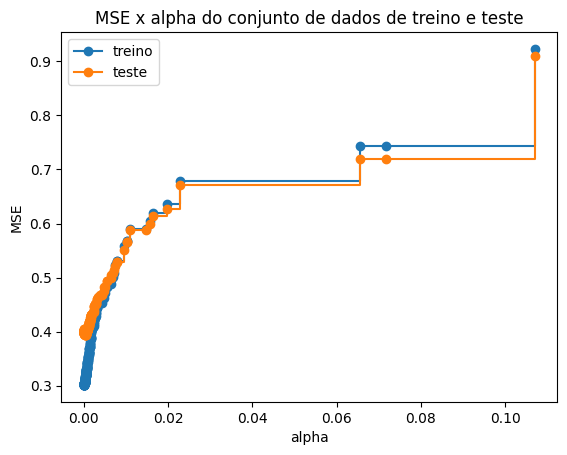

In [89]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste", drawstyle="steps-post")
ax.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [90]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=0.03)
arvore_final.fit(X_train, y_train)

print(f"profundidade: {arvore_final.tree_.max_depth}")
print(f"R-quadrado na base teste: {arvore_final.score(X_test, y_test):.2f}")
print(f"MSE de teste: {mean_squared_error(y_test, arvore_final.predict(X_test)):.2f}")

profundidade: 3
R-quadrado na base teste: 0.49
MSE de teste: 0.67


### 7. Visualize esta árvore.

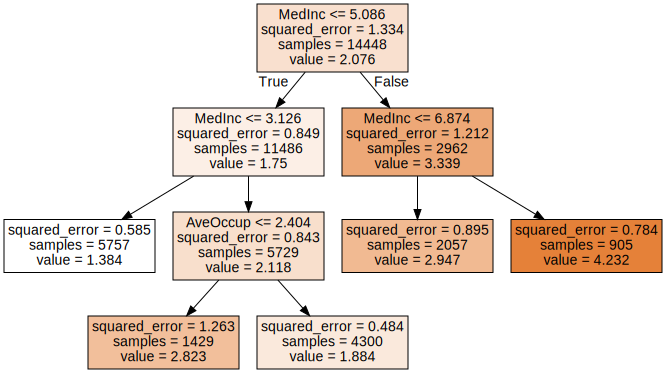

In [91]:
visualisacao_dot = export_graphviz(arvore_final, out_file=None, feature_names = X.columns, filled=True)
graph = graphviz.Source(visualisacao_dot, format='png')
graph